## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:

data_path = r"C:\Users\Odogw\Downloads\stack-overflow-developer-survey-2025\survey_results_public.csv"
df = pd.read_csv(data_path, low_memory=False)

print("Initial shape:", df.shape)
df.head()

Initial shape: (49191, 172)


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


## Tasks 1: Data Cleaning, Initial Exploration and Visualization

In [4]:
# keep only rows with RemoteWork and JobSat

df_clean = df.dropna(subset=["RemoteWork", "JobSat"]).copy()
print("Rows with both RemoteWork and JobSat:", df_clean.shape)


Rows with both RemoteWork and JobSat: (22797, 172)


In [5]:
# Create Remote and Onsite variables

df_clean["WorkMode"] = "other"

df_clean.loc[df_clean["RemoteWork"].isin(["Remote","Your choice (very flexible, you can come in when you want or just as needed)"]), "WorkMode"] = "remote"

df_clean.loc[df_clean["RemoteWork"].isin(["In-person"]), "WorkMode"] = "onsite"

print(df_clean["WorkMode"].value_counts(dropna=False))


WorkMode
remote    10756
other      8545
onsite     3496
Name: count, dtype: int64


In [6]:
# Filter to Keep only reomte and onsite

df_analysis = df_clean[df_clean["WorkMode"].isin(["remote", "onsite"])].copy()

print("Final analysis size:", df_analysis.shape)
print(df_analysis["WorkMode"].value_counts())


Final analysis size: (14252, 173)
WorkMode
remote    10756
onsite     3496
Name: count, dtype: int64


The dataset was filtered to include only respondents who reported both a work arrangement and a job satisfaction score. Work arrangements were then simplified into remote and onsite categories to allow a clear comparison.


In [7]:
# Summary statistics

df_analysis.groupby("WorkMode")["JobSat"].describe()



,count,mean,std,min,25%,50%,75%,max
WorkMode,,,,,,,,
onsite,3496.0,6.988272,2.045583,0.0,6.0,7.0,8.0,10.0
remote,10756.0,7.351153,1.934989,0.0,6.0,8.0,9.0,10.0


The summary statistics show that remote workers have a higher median and mean job satisfaction than onsite workers, motivating a formal hypothesis test.


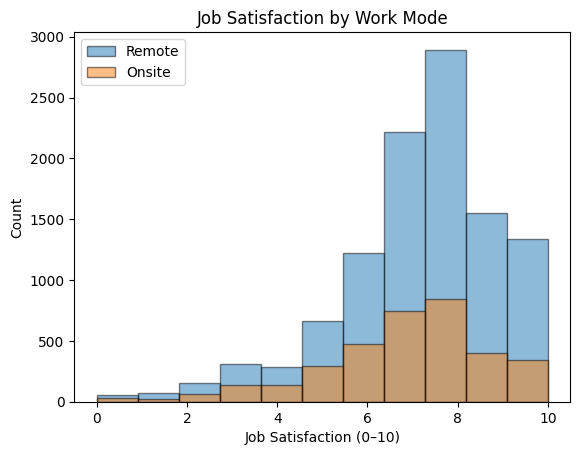

In [19]:
# Plot 

remote = df_analysis[df_analysis["WorkMode"]=="remote"]["JobSat"]
onsite = df_analysis[df_analysis["WorkMode"]=="onsite"]["JobSat"]

plt.hist(remote, bins=11, alpha=0.5, label="Remote", edgecolor='black')
plt.hist(onsite, bins=11, alpha=0.5, label="Onsite", edgecolor='black')
plt.title("Job Satisfaction by Work Mode")
plt.xlabel("Job Satisfaction (0–10)")
plt.ylabel("Count")
plt.legend()
plt.show()


C:\Users\Odogw\AppData\Local\Temp\ipykernel_25992\2090680925.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["Remote", "Onsite"])


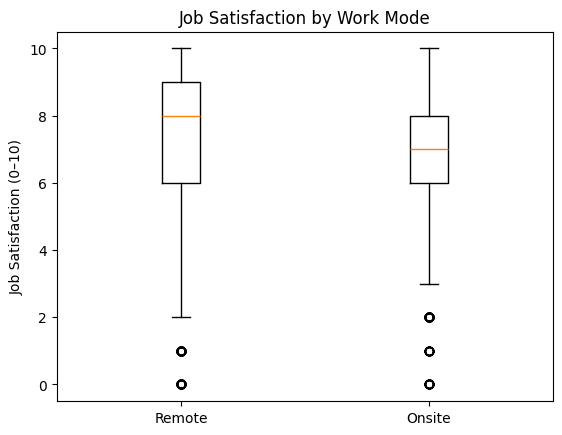

In [9]:
data_to_plot = [remote, onsite]

plt.boxplot(data_to_plot, labels=["Remote", "Onsite"])
plt.title("Job Satisfaction by Work Mode")
plt.ylabel("Job Satisfaction (0–10)")
plt.show()


The Histogram and boxplot shows that remote workers report higher job satisfaction on average, with a higher median and slightly narrower spread compared to onsite workers.


## Task 2: Permutation Test

In [10]:
remote = df_analysis[df_analysis["WorkMode"] == "remote"]["JobSat"].values
onsite = df_analysis[df_analysis["WorkMode"] == "onsite"]["JobSat"].values

len(remote), len(onsite)


(10756, 3496)

In [11]:
# Observed difference

obs_diff = remote.mean() - onsite.mean()
obs_diff


np.float64(0.36288053371094886)

### Simulation

In [12]:
# Combine data

combined = np.concatenate([remote, onsite])
labels = np.array(["remote"] * len(remote) + ["onsite"] * len(onsite))


In [13]:
# shuffle and compute differences

num_permutations = 5000
perm_diffs = []

for _ in range(num_permutations):
    shuffled_labels = np.random.permutation(labels)
    
    perm_remote_mean = combined[shuffled_labels == "remote"].mean()
    perm_onsite_mean = combined[shuffled_labels == "onsite"].mean()
    
    perm_diffs.append(perm_remote_mean - perm_onsite_mean)


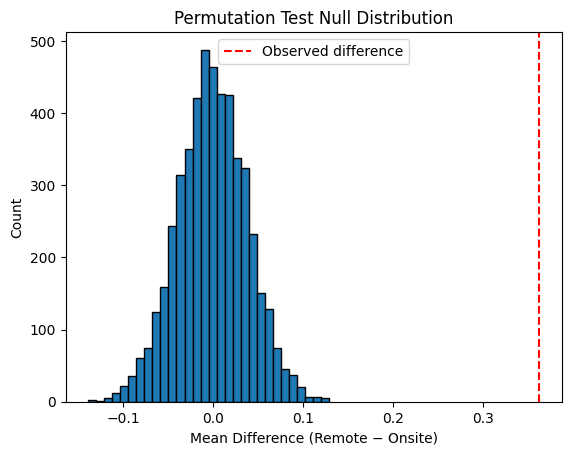

In [14]:
# Plot

plt.hist(perm_diffs, bins=30, edgecolor="black")
plt.axvline(obs_diff, color="red", linestyle="--", label="Observed difference")
plt.title("Permutation Test Null Distribution")
plt.xlabel("Mean Difference (Remote − Onsite)")
plt.ylabel("Count")
plt.legend()
plt.show()


In [15]:
# Compute the P-value
p_value = np.mean(np.array(perm_diffs) >= obs_diff)
p_value


np.float64(0.0)

The permutation test shows that this difference is extremely unlikely under the null hypothesis. None of the 5,000 shuffled samples produced a difference as large as what we observed.

## Task 3: Bootstrapping

In [16]:
def bootstrap_median(data, n_boot=5000):
    medians = []
    n = len(data)
    
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        medians.append(np.median(sample))
    
    ci = np.percentile(medians, [2.5, 97.5])
    return ci, medians


In [17]:
# Bootstrap fo each group

remote_ci, remote_boot = bootstrap_median(remote)
onsite_ci, onsite_boot = bootstrap_median(onsite)

remote_ci, onsite_ci


(array([8., 8.]), array([7., 7.]))

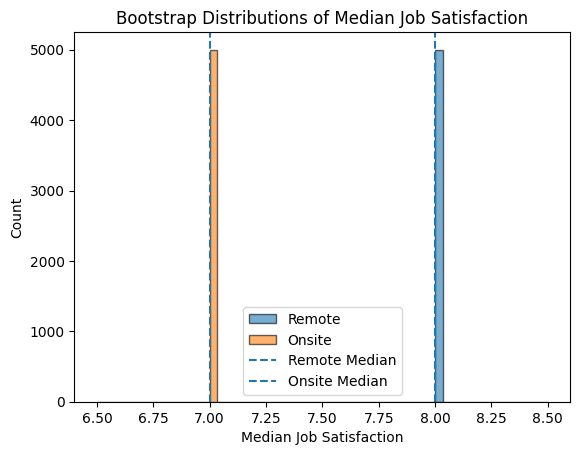

In [18]:
import matplotlib.pyplot as plt

plt.hist(remote_boot, bins=30, alpha=0.6, label="Remote", edgecolor="black")
plt.hist(onsite_boot, bins=30, alpha=0.6, label="Onsite", edgecolor="black")

plt.axvline(np.median(remote), linestyle="--", label="Remote Median")
plt.axvline(np.median(onsite), linestyle="--", label="Onsite Median")

plt.title("Bootstrap Distributions of Median Job Satisfaction")
plt.xlabel("Median Job Satisfaction")
plt.ylabel("Count")
plt.legend()
plt.show()


The confidence intervals are very tight and do not overlap, reinforcing that the difference is stable and robust.